<a href="https://colab.research.google.com/github/rambakale/Credit-card/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Importing packages
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [ ]:
# Mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
file_path = '/content/drive/MyDrive/Credit Card Default Prediction/Data & Resources/default of credit card clients.xls'

In [ ]:
# Reading our Dataset
data = pd.read_csv('/content/drive/MyDrive/Capstone Project 3/default of credit card clients.xls', header=1)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# top 5 rows of the given dataset
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#  bottom 5 rows of the given dataset
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
# information of our Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# description of the dataset to get insights of the data
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# describe() gives the overall descriptive summary of the dataframe
data.describe(include='all').T       # transpose() convert the column to row and row to column.

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
#  Shape of the dataset
print('Rows {} , Columns {}'.format(data.shape[0], data.shape[1]))

Rows 30000 , Columns 25


# **Preprocessing the dataset**
In real world the data has a lot of missing values and it is due to data corruption or fail to record the data. For that purpose it is very important to handle the missing values also many of machine learning algorithms do not support missing values, that's why we check missing values first.

In [ ]:
# Checking the count of  null values in our dataset.
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
# getting the unique number of values in the dataset
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [ ]:
# Checking the totol number of duplicate values 
print('Duplicate values in our dataset are:',len(data[data.duplicated()]))

Duplicate values in our dataset are: 0


# **There are no null values and duplicate values in our dataset.**

# **Here we creating a copy of dataframe**

In [ ]:
# Creating a copy of dataframe
df = data.copy()

In [ ]:
print('Column names are :\n',list(df.columns))

Column names are :
 ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


# Renaming columns.


In [ ]:
# renaming the columns
df.rename(columns = {'default payment next month':'Next_month_defaulter','PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN',
                     
                   'PAY_5':'PAY_MAY','PAY_6':'PAY_APR','BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL',

                   'BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR','PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG',
                   
                   'PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'} ,inplace=True )

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Next_month_defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **Exploratory Data Analysis**

In [ ]:
# this will count the values of column of the dataset
# this is the dependent variable
df['Next_month_defaulter'].value_counts()

0    23364
1     6636
Name: Next_month_defaulter, dtype: int64

# **Dependent Variable**

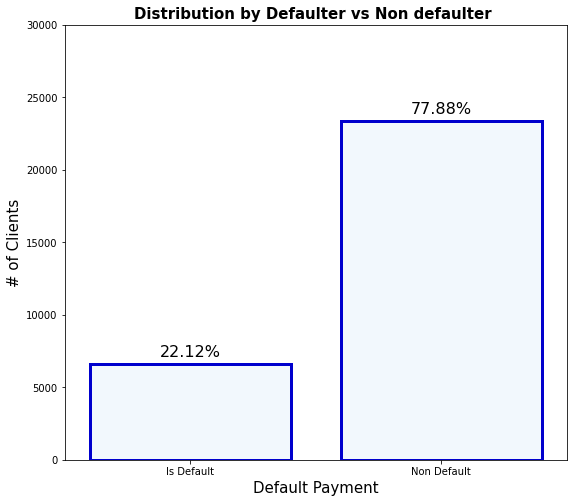

In [ ]:
# Replacing the values of 0 and 1 to string values for better understanding.
df['Defaulter'] = df.Next_month_defaulter.replace([1,0], ['Is Default', 'Non Default'])

#plotting the count plot to visualize the data distribution 
plt.figure(figsize=(9,8))
ax = sns.countplot(x="Defaulter", data=df,color = 'aliceblue', edgecolor = 'mediumblue',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,30000)        # making the y-axis limit to 30,000
plt.title('Distribution by Defaulter vs Non defaulter ',weight ='bold', fontsize= 15)
for p in ax.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# Inference:

For Next_month_defaulter column:- we replace 0 with 'Non Default' and 1 with 'Is Default' and store in a new variable 'Defaulter'.
From above plot we can see that Defaulters are less than the Non Defaulters.
Approx 78% are Non Defaulters and 22% are Defaulters. 

# **Independent variable**

The  categorical features in  dataset that are:

SEX

EDUCATION

MARRIAGE

Age

 checking their relation with dependent variable.

# **SEX**

In [ ]:
print('SEX column distribution : 1=Male, 2=Female')
df['SEX'].value_counts()

SEX column distribution : 1=Male, 2=Female


2    18112
1    11888
Name: SEX, dtype: int64

# **Education**

In [ ]:
print('EDUCATION column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown')
df['EDUCATION'].value_counts()

EDUCATION column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

# **Since 5 and 6 is unknown and 0 isn't explained in the dataset description, so we move this category to 4 which is others.**

In [ ]:
colm = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[colm, 'EDUCATION'] = 1
df['EDUCATION'].value_counts()

2    14030
1    10930
3     4917
4      123
Name: EDUCATION, dtype: int64

# **MARRIAGE**

In [ ]:
print('MARRIAGE column distribution : 1=Married, 2=Single, 3=Others')
df['MARRIAGE'].value_counts()

MARRIAGE column distribution : 1=Married, 2=Single, 3=Others


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

# **In marriage 0 is not explained so we put this 0 category to 3.**

In [ ]:
colm = df['MARRIAGE'] == 0
df.loc[colm, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

#  **We create a new variable and store the categorical features to that variable and add dependent variable for analysis of these features.**

In [ ]:
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [ ]:
df_category = df[cat_features]
df_category = pd.concat([df_category, df['Defaulter']], axis=1)


In [ ]:
#  replace the values of categorical column by names as given in the data 
df_category.replace({'SEX':{1:'Male', 2:'Female'} , 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
               'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
df_category.head(5)

,SEX,EDUCATION,MARRIAGE,Defaulter
0,Female,university,married,Is Default
1,Female,university,single,Is Default
2,Female,university,single,Non Default
3,Female,university,married,Non Default
4,Male,university,married,Non Default


# **Based on  categorical features we can say that whether a customer is default or not.**

Female    18112
Male      11888
Name: SEX, dtype: int64 

Defaulter  Is Default  Non Default
SEX                               
Female           3763        14349
Male             2873         9015


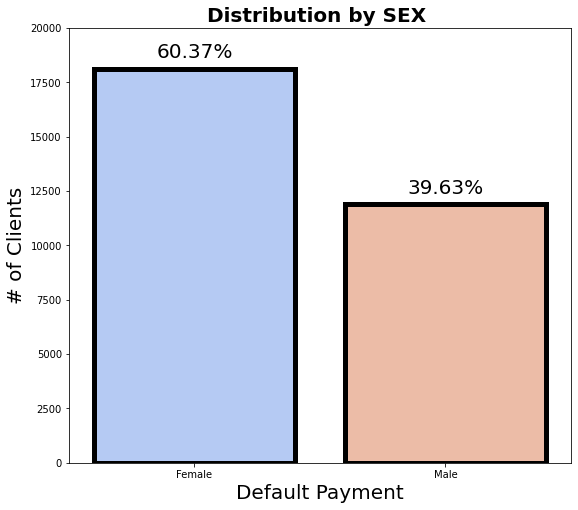

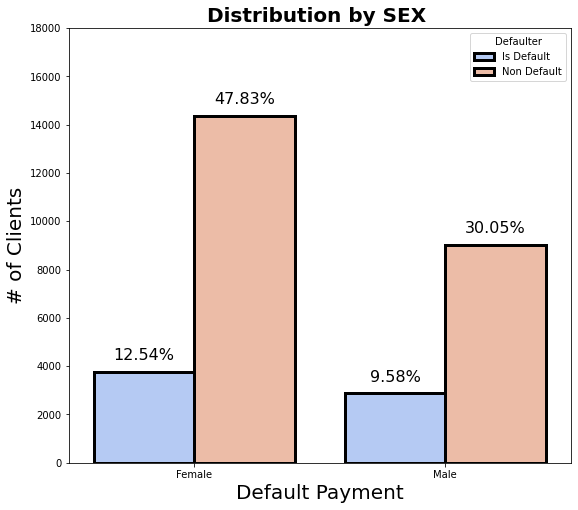

In [ ]:
print(df_category['SEX'].value_counts(),'\n')
print(df_category.groupby(['SEX', 'Defaulter']).size().unstack()) 

#plotting graph for SEX feature
plt.figure(figsize=(9,8))
ax = sns.countplot(x="SEX", data=df_category,  palette = 'coolwarm', edgecolor = 'black',lw =5)
plt.xlabel("Default Payment", fontsize= 20)
plt.ylabel("# of Clients", fontsize= 20)
plt.ylim(0,20000)
plt.title('Distribution by SEX ',weight ='bold', fontsize= 20)
for p in ax.patches:                              
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 20)

# plotting graph for SEX [Is Defaulter or not]
plt.figure(figsize=(9,8))
ax = sns.countplot(x="SEX", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 20)
plt.ylabel("# of Clients", fontsize= 20)
plt.ylim(0,18000)
plt.title('Distribution by SEX ',weight ='bold', fontsize= 20)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# **From the above data analysis we can say that**




# Number of Male credit holders is less than Female.
# Approx 40% are male and 60% are Female and in that 10% are default from male & 13% are default from female.

university         14030
graduate school    10930
high school         4917
others               123
Name: EDUCATION, dtype: int64 

Defaulter        Is Default  Non Default
EDUCATION                               
graduate school        2062         8868
high school            1237         3680
others                    7          116
university             3330        10700


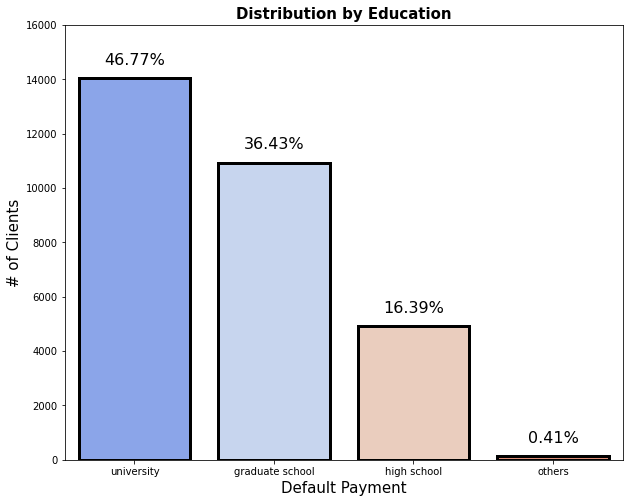

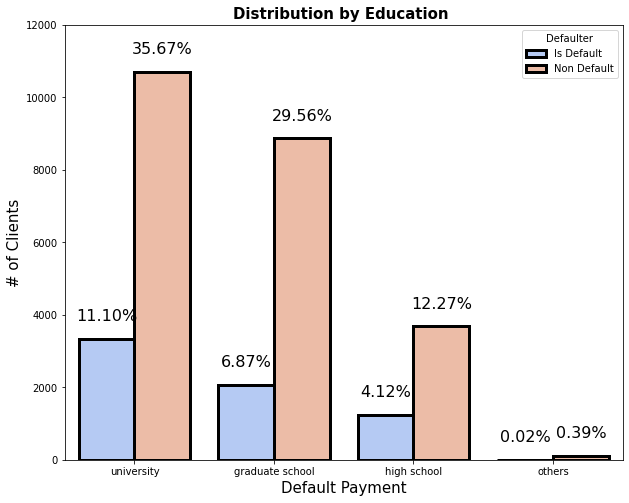

In [ ]:
print(df_category['EDUCATION'].value_counts(),'\n')
print(df_category.groupby(['EDUCATION', 'Defaulter']).size().unstack()) 

#plotting graph for Education
plt.figure(figsize=(10,8))
ax = sns.countplot(x="EDUCATION", data=df_category,  palette = 'coolwarm', edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,16000)
plt.title('Distribution by Education',weight ='bold', fontsize= 15)
for p in ax.patches:                              
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# plotting graph for Education [university, graduate school, highschool, others]
plt.figure(figsize=(10,8))
ax = sns.countplot(x="EDUCATION", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,12000)
plt.title('Distribution by Education ',weight ='bold', fontsize= 15)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# From the above data analysis we can say that
# 1 - graduate school
# 2 - university
# 3 - high school
# 4 - others  
# More number of credit holders are university students followed by Graduates and then High school students.
# From university 11% are default, from graduate 7% are default, and from high school 4% are default. 

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64 

Defaulter  Is Default  Non Default
MARRIAGE                          
married          3206        10453
others             89          288
single           3341        12623


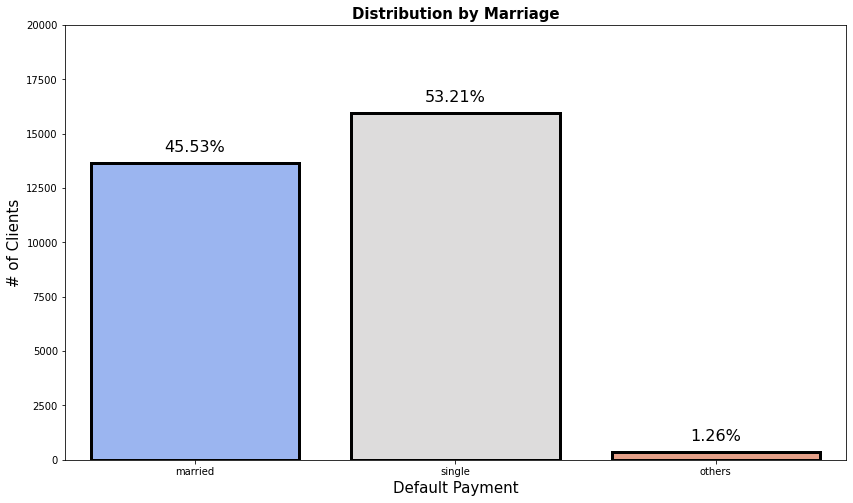

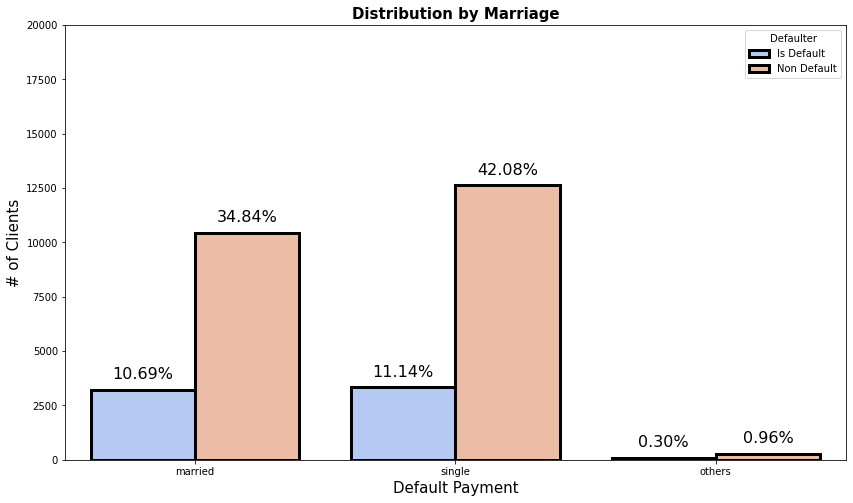

In [ ]:
print(df_category['MARRIAGE'].value_counts(),'\n')
print(df_category.groupby(['MARRIAGE', 'Defaulter']).size().unstack())          

#plotting graph for Marriage
plt.figure(figsize=(14,8))
ax = sns.countplot(x="MARRIAGE", data=df_category,  palette = 'coolwarm', edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,20000)
plt.title('Distribution by Marriage',weight ='bold', fontsize= 15)
for p in ax.patches:                              
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# plotting graph for Marriage [married, single, others]
plt.figure(figsize=(14,8))
ax = sns.countplot(x="MARRIAGE", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,20000)
plt.title('Distribution by Marriage',weight ='bold', fontsize= 15)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)

# From the above data analysis we can say that

# 1 - Married

# 2 - Single

# 3 - Others

# More number of credit cards holder are single as compared to married.
# From single 11% are defaulters and from married approx 11% are defaulter. 

# **AGE**

In [ ]:
#  groupby Age and Defaulter column to get number of defaults and non defaults. 
df_age =  df.groupby(['AGE', 'Defaulter']).size().unstack()
df_age

Defaulter,Is Default,Non Default
AGE,,
21,14.0,53.0
22,169.0,391.0
23,247.0,684.0
24,300.0,827.0
25,302.0,884.0
26,253.0,1003.0
27,313.0,1164.0
28,286.0,1123.0
29,313.0,1292.0


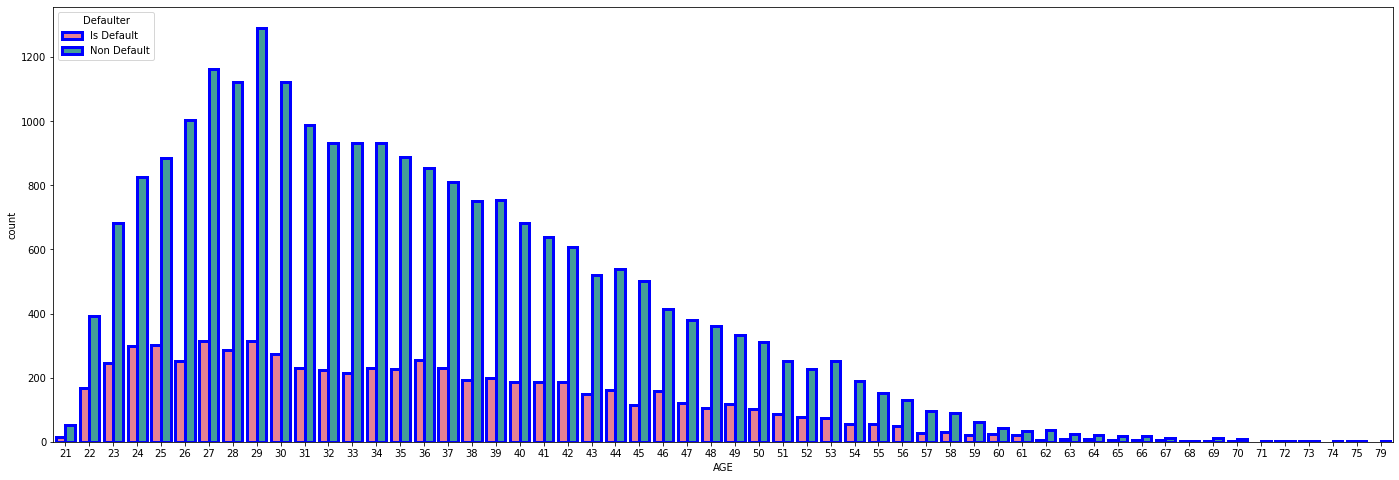

In [ ]:
#plotting the count plot to vizualize the data distribution with respect to Age
plt.figure(figsize=[24, 8])
sns.countplot(x = 'AGE', hue = 'Defaulter', data =df, palette = 'husl', edgecolor = 'blue',lw=3)

# From the above graph we can say that

# More number of credit card holders age between 26-32 years and 29 years age is the highest uses of credit card.
# Age above 60 years old rarely uses the credit card.
# more number of Defaulters are between 27-29 years.

# **LIMIT BALANCE**

In [ ]:
# Here we groupby LIMIT_BAL and Defaulter column to get number of defaults and non defaults. 
df_limit = df.groupby(['LIMIT_BAL', 'Defaulter']).size().unstack()
df_limit.head(10)

Defaulter,Is Default,Non Default
LIMIT_BAL,,
10000,197.0,296.0
16000,NaN,2.0
20000,698.0,1278.0
30000,568.0,1042.0
40000,92.0,138.0
50000,885.0,2480.0
60000,233.0,592.0
70000,210.0,521.0
80000,363.0,1204.0


Text(0.5, 1.0, 'LIMIT BALANCE on TYPE OF CREDIT CARD')

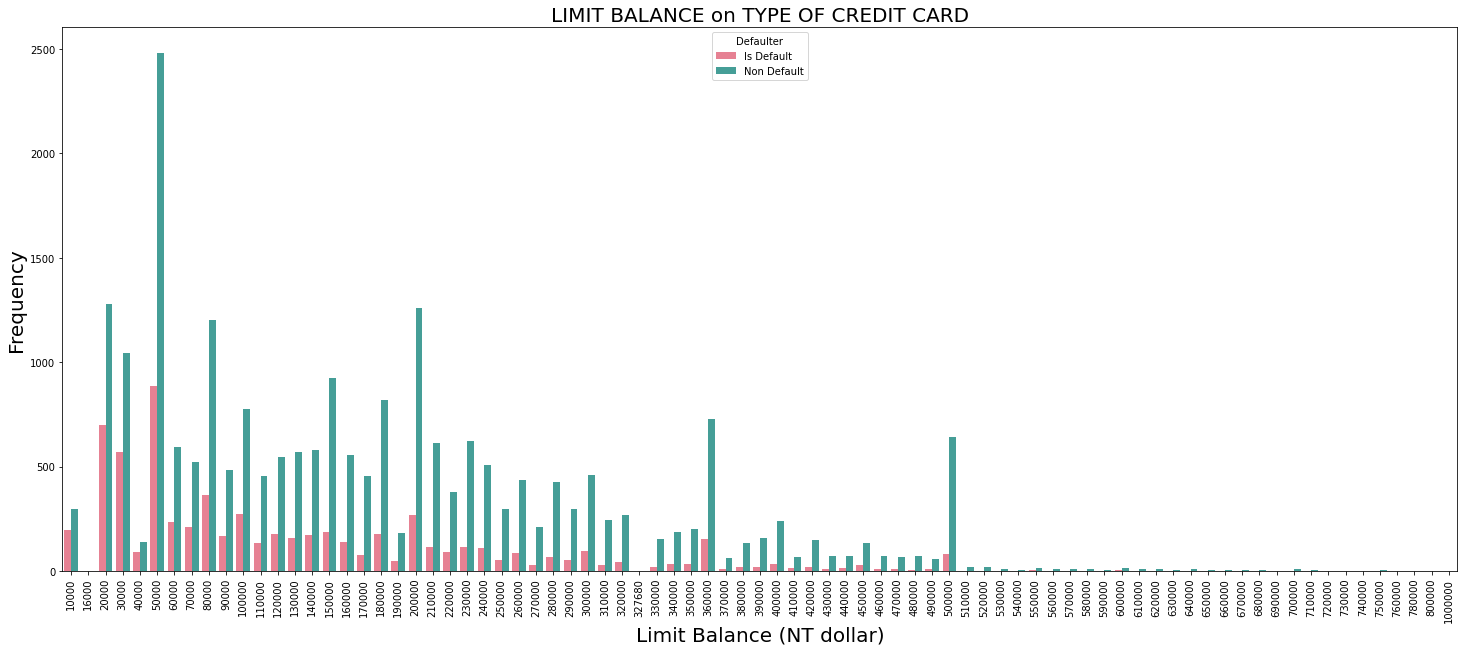

In [ ]:
#plotting the count plot to visualize the data distribution with respect to Limit Balance
plt.figure(figsize=[25, 10])
sns.countplot(x = 'LIMIT_BAL', hue = 'Defaulter',data =df, palette = 'husl')
plt.xticks(rotation = 90)
plt.xlabel('Limit Balance (NT dollar)', SIZE=20)
plt.ylabel('Frequency', SIZE=20)
plt.title('LIMIT BALANCE on TYPE OF CREDIT CARD', SIZE=20)

**Maximum amount of given credit in NT dollars is 50,000.**





# **Last payment status**

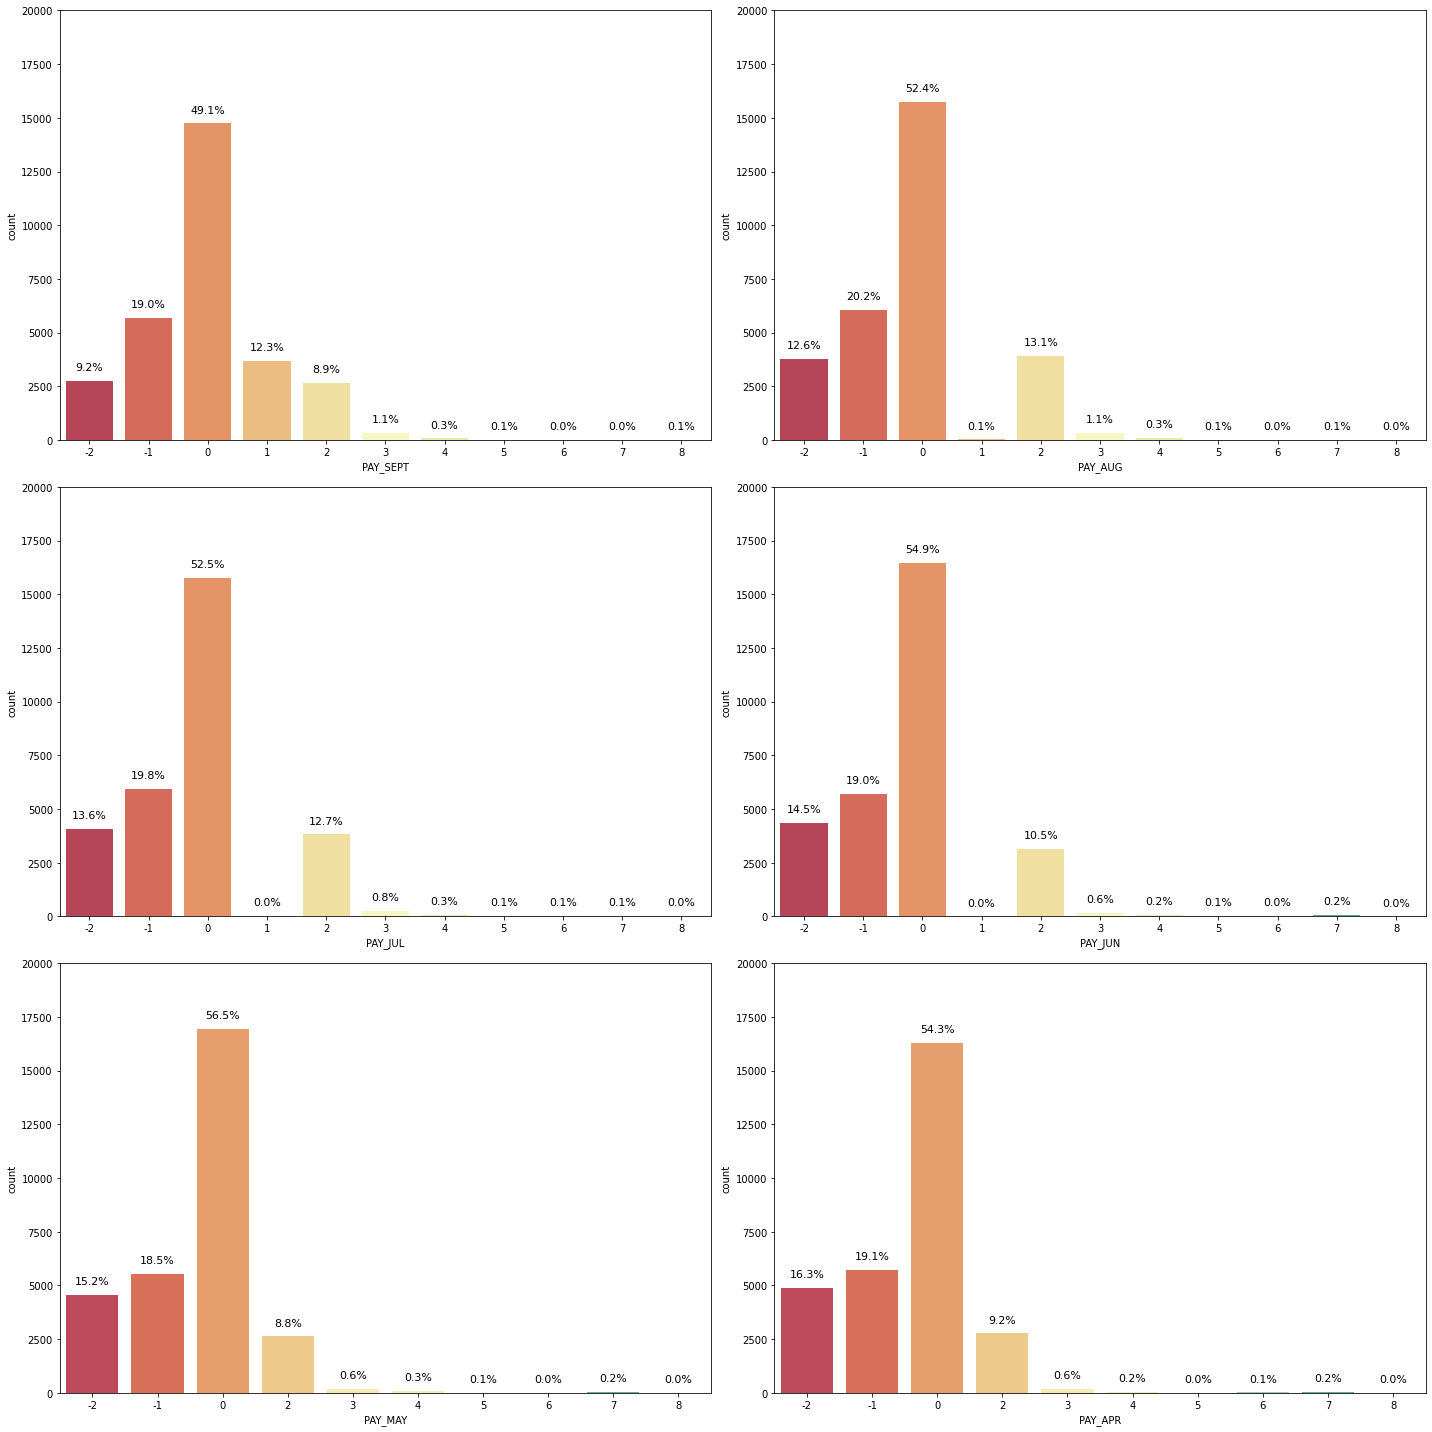

In [ ]:
# getting payment columns for each month.
pay = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

# Plotting graph for payment columns 
plt.figure(figsize=(20,20))
for i,col in enumerate(pay):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'Spectral')
    plt.ylim(0,20000)
    plt.ylabel('count')
    plt.tight_layout()

    for p in ax.patches:                               
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.1f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 11)

# **From this we can see that maximum number of defaulters are delaying payment after 2 months.**

# **Amount of bill statement for every month**

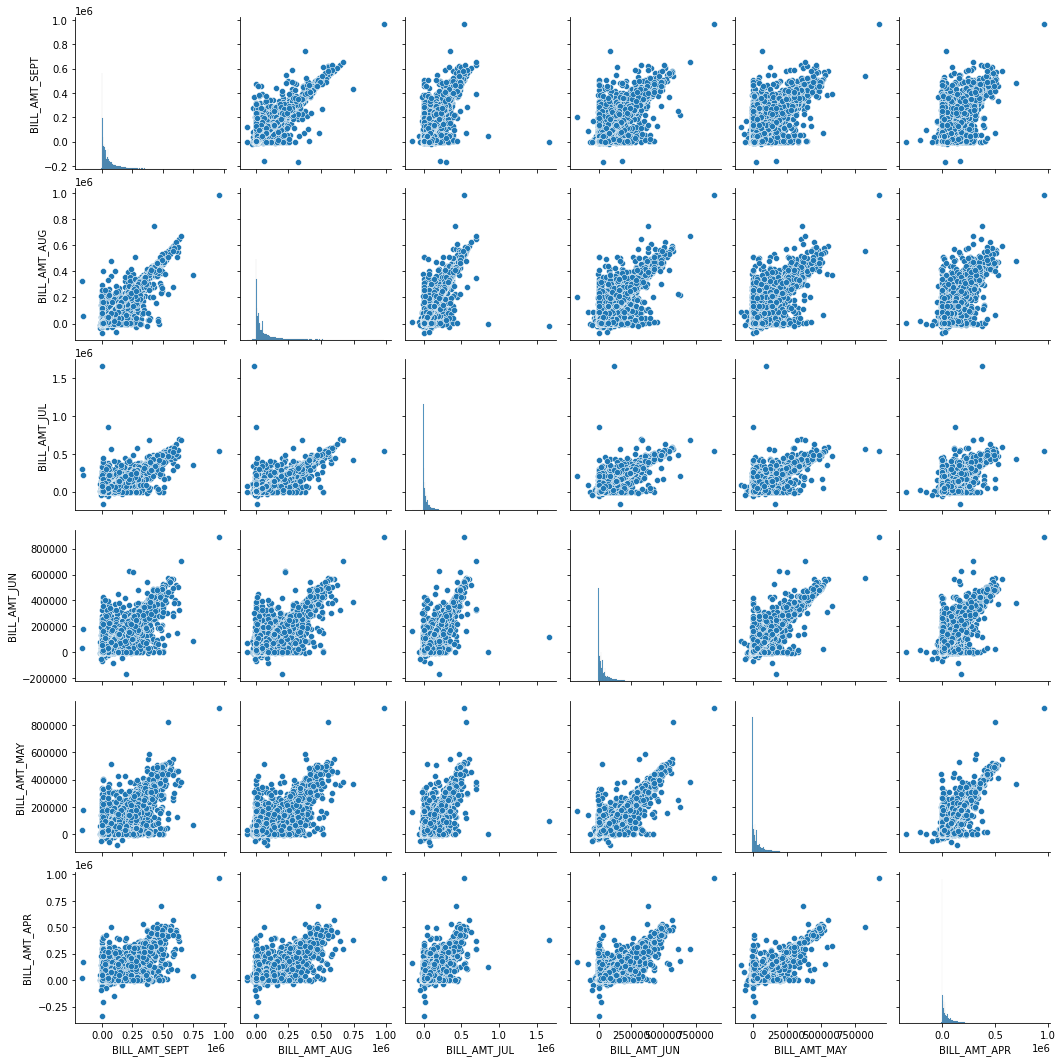

In [ ]:
#assigning the bill amount features to a single variable 
df_bill_amount = df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]
#plotting the pair plot for bill amount
sns.pairplot(data = df_bill_amount)

# **Outliers Detection using boxplot**
# **We use boxplot to see outliers in our dataset.**

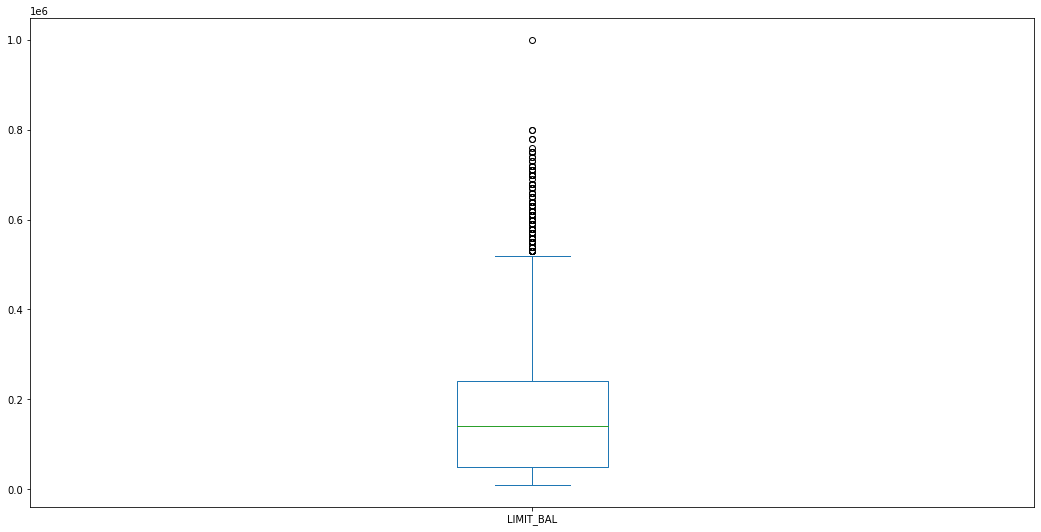

In [ ]:
#Using boxplot to see outliers in the dataset
plt.figure(figsize=(18,9))
df["LIMIT_BAL"].plot(kind="box")
plt.show()

#  We  can see that there are outliers in the dataset,to remove them we are using IQR 

In [ ]:
def remove_outlier_using_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_output = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_output

In [ ]:
df["LIMIT_BAL"] = remove_outlier_using_IQR(df["LIMIT_BAL"])

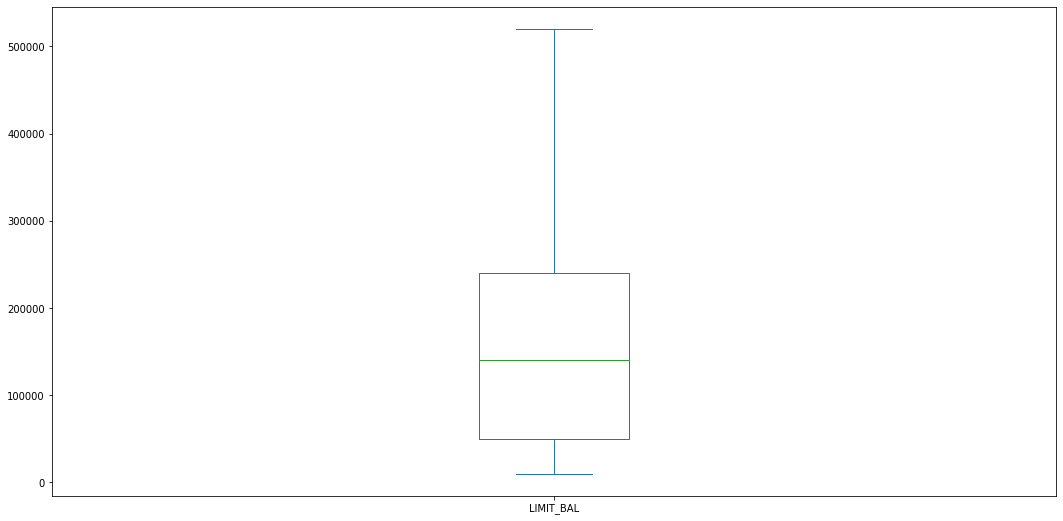

In [ ]:
#After removal of outliers
plt.figure(figsize=(18,9))
df["LIMIT_BAL"].plot(kind="box")
plt.show()

# **Checking correlation between the variables**

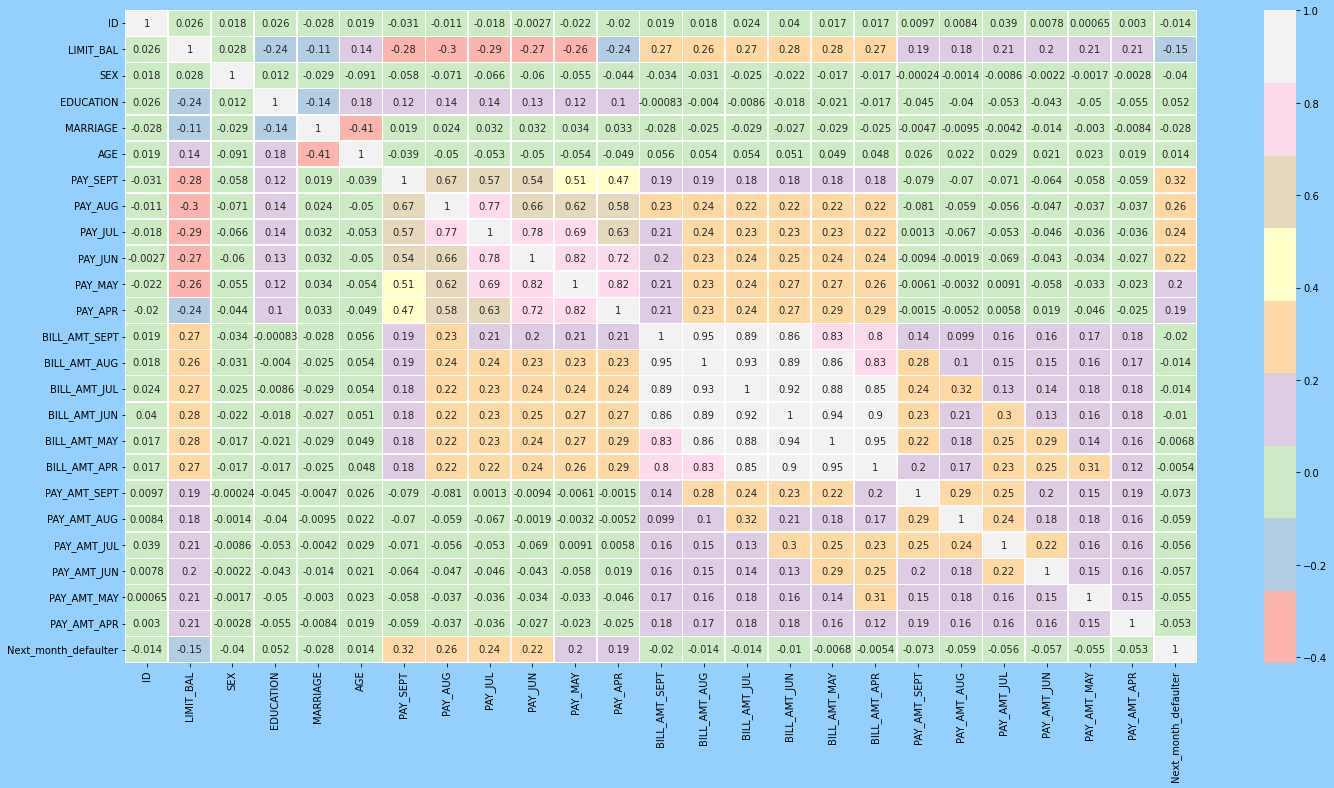

In [ ]:
plt.figure (figsize= (24,12),edgecolor='k',facecolor='xkcd:light blue')
correlation= df.corr()
sns.heatmap(correlation, annot=True, cmap='Pastel1',linewidths=.6)

#  There are  negatively correlated features like age and marriage.

# **FEATURE ENGINEERING**-

# **ONE HOT ENCODING**- 

 One hot encoding is a process by which categorical variables are converted into a numerical variables so that they can be provided to ML algorithms.
 We are performing one hot encoding on 'EDUCATION', 'MARRIAGE', and 'SEX'.

In [ ]:
#getting the dummies 
df = pd.get_dummies(df,columns=['EDUCATION','SEX','MARRIAGE'])

In [ ]:
# removing some columns that are not important.
df.drop(['ID','Defaulter','AGE'], axis=1,inplace =True)

In [ ]:
df = df.dropna()

In [ ]:
df=df.astype('int64')
df.shape

(29833, 29)

In [ ]:
df.head(10)

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,Next_month_defaulter,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,1,0,1,0,0,0,1,1,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,1,0,1,0,0,0,1,0,1,0
2,90000,0,0,0,0,0,0,29239,14027,13559,...,0,0,1,0,0,0,1,0,1,0
3,50000,0,0,0,0,0,0,46990,48233,49291,...,0,0,1,0,0,0,1,1,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,...,0,0,1,0,0,1,0,1,0,0
5,50000,0,0,0,0,0,0,64400,57069,57608,...,0,1,0,0,0,1,0,0,1,0
6,500000,0,0,0,0,0,0,367965,412023,445007,...,0,1,0,0,0,1,0,0,1,0
7,100000,0,-1,-1,0,0,-1,11876,380,601,...,0,0,1,0,0,0,1,0,1,0
8,140000,0,0,2,0,0,0,11285,14096,12108,...,0,0,0,1,0,0,1,1,0,0
9,20000,-2,-2,-2,-2,-1,-1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


# **Creating  the Dependent and Independent Variables:**

In [ ]:
X = df.drop(['Next_month_defaulter'] , axis=1)
y = df['Next_month_defaulter']
# using lambda function
X = X.apply(lambda x : (x-np.mean(x))/np.std(x))
X.head(10)

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,PAY_AMT_APR,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,-1.154838,1.792316,1.779811,-0.697360,-0.667088,-1.529521,-1.485913,-0.650323,-0.655496,-0.676010,...,-0.294257,-0.755197,1.065170,-0.443313,-0.06408,-0.809660,0.809660,1.094221,-1.066749,-0.113132
1,-0.358196,-0.876122,1.779811,0.137519,0.187336,0.233726,1.989732,-0.667504,-0.675375,-0.646506,...,-0.179347,-0.755197,1.065170,-0.443313,-0.06408,-0.809660,0.809660,-0.913892,0.937428,-0.113132
2,-0.597189,0.013357,0.110380,0.137519,0.187336,0.233726,0.251909,-0.296853,-0.497773,-0.485481,...,-0.006982,-0.755197,1.065170,-0.443313,-0.06408,-0.809660,0.809660,-0.913892,0.937428,-0.113132
3,-0.915845,0.013357,0.110380,0.137519,0.187336,0.233726,0.251909,-0.049106,-0.003947,0.043499,...,-0.236802,-0.755197,1.065170,-0.443313,-0.06408,-0.809660,0.809660,1.094221,-1.066749,-0.113132
4,-0.915845,-0.876122,0.110380,-0.697360,0.187336,0.233726,0.251909,-0.584670,-0.618422,-0.155705,...,-0.255245,-0.755197,1.065170,-0.443313,-0.06408,1.235086,-1.235086,1.094221,-1.066749,-0.113132
5,-0.915845,0.013357,0.110380,0.137519,0.187336,0.233726,0.251909,0.193882,0.123617,0.166625,...,-0.248293,1.324157,-0.938817,-0.443313,-0.06408,1.235086,-1.235086,-0.913892,0.937428,-0.113132
6,2.669041,0.013357,0.110380,0.137519,0.187336,0.233726,0.251909,4.430682,5.248028,5.901722,...,0.496898,1.324157,-0.938817,-0.443313,-0.06408,1.235086,-1.235086,-0.913892,0.937428,-0.113132
7,-0.517524,0.013357,-0.724336,-0.697360,0.187336,0.233726,-0.617002,-0.539185,-0.694793,-0.677313,...,-0.205661,-0.755197,1.065170,-0.443313,-0.06408,-0.809660,0.809660,-0.913892,0.937428,-0.113132
8,-0.198868,0.013357,0.110380,1.807277,0.187336,0.233726,0.251909,-0.547434,-0.496777,-0.506962,...,-0.236802,-0.755197,-0.938817,2.255741,-0.06408,-0.809660,0.809660,1.094221,-1.066749,-0.113132
9,-1.154838,-1.765602,-1.559052,-1.532240,-1.521512,-0.647897,-0.617002,-0.704936,-0.700279,-0.686210,...,-0.294257,-0.755197,-0.938817,2.255741,-0.06408,1.235086,-1.235086,-0.913892,0.937428,-0.113132


In [ ]:
y.head(10).reset_index()

,index,Next_month_defaulter
0,0,1
1,1,1
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


# **Splitting the dataset into training and test set.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y)

In [ ]:
# Checking  the shape of train dataset
print(X_train.shape,y_train.shape)

(20883, 28) (20883,)


In [ ]:
# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(8950, 28) (8950,)


# **Oversampling**
# As there is  imbalance in the  dataset so we have to apply Random Over Sampling to balance it.

# **Random oversampling** :- Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset.

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

# fit predictor and target variable
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_ros))

Original dataset shape Counter({0: 16251, 1: 4632})
Resample dataset shape Counter({1: 16251, 0: 16251})


# **Model selection**

# **Performance Metrics**
# **Precision** is a good metric to use when the costs of false positive(FP) is high.

# Precision = TP / (TP + FP)

# **Recall** is a good metric to use when the cost associated with false negative(FN) is high.

# Recall = TP / (TP + FN)

## **F1-score** is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.

# F1-score = 2 (precision recall) / (precision + recall)

# **Logistic Regression**

# **Implementing Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }   #set the parameter

logistic_model= GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
logistic_model.fit(X_train_ros, y_train_ros)            #fit the model 

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
optimized_clf =logistic_model.best_estimator_

In [ ]:
logistic_model.best_params_

{'C': 1, 'penalty': 'l2'}

In [ ]:
logistic_model.best_score_

0.6809427112177712

In [ ]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.6999473255758272
The accuracy on test data is  0.6845810055865922


In [ ]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)
print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.6845810055865922
The precision on test data is  0.6085642317380353
The recall on test data is  0.3712354025814382
The f1 on test data is  0.46115670929566716
The roc_score on test data is  0.6174119428637528


[[11614  4637]
 [ 1629  3003]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

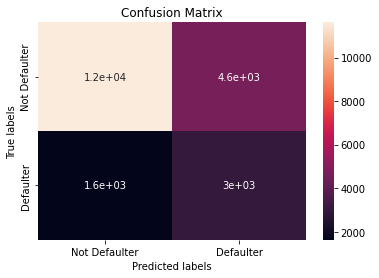

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

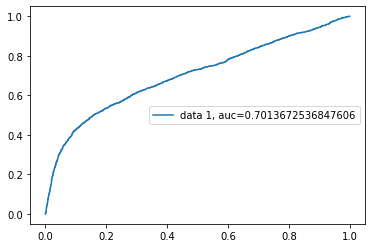

In [ ]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=5)
plt.show()

# **Implementing SVC**

In [ ]:
from sklearn import svm
 
#Create a svm Classifier
svm_model = svm.SVC(kernel = 'rbf') 
 
#Train the model using the training sets
svm_model.fit(X_train_ros, y_train_ros)

SVC()

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100,1000],'kernel': ['rbf']}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Get the y- train & test predicted values
y_train_preds_svm = svm_model.predict(X_train_ros)
y_test_preds_svm = svm_model.predict(X_test)

In [ ]:
#get the accuracy score
svm_train_accuracy= accuracy_score(y_train_ros, y_train_preds_svm)
svm_test_accuracy= accuracy_score(y_test, y_test_preds_svm)

print("The accuracy on train data is ", svm_train_accuracy)
print("The accuracy on test data is ", svm_test_accuracy)

The accuracy on train data is  0.7361393145037228
The accuracy on test data is  0.7704786164365196


In [ ]:
svm_test_precision= precision_score(y_test, y_test_preds_svm)
svm_test_recall= recall_score(y_test, y_test_preds_svm)
svm_test_f1score= f1_score(y_test, y_test_preds_svm)
svm_test_roc_auc= roc_auc_score(y_test, y_test_preds_svm)
svm_test_confusion_matrix= confusion_matrix(y_test, y_test_preds_svm)

print("The precision on test data is:", svm_test_precision)
print("The recall on test data is:", svm_test_recall)
print("The f1 on test data is:", svm_test_f1score)
print("The roc_auc_score on test data is:", svm_test_roc_auc)
print("The confusion matrix on test data is: \n", svm_test_confusion_matrix)

The precision on test data is: 0.48442534908700324
The recall on test data is: 0.5453446191051995
The f1 on test data is: 0.5130830489192264
The roc_auc_score on test data is: 0.6899849710513077
The confusion matrix on test data is: 
 [[4845  960]
 [ 752  902]]


[Text(0, 0.5, 'Non Defaulter'), Text(0, 1.5, 'IsDefaulter')]

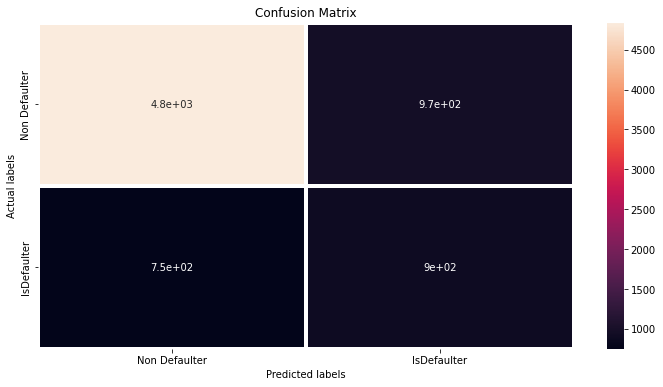

In [ ]:
# Get the confusion matrix for svm 
labels = ['Non Defaulter', 'IsDefaulter']

plt.figure (figsize= (12,6))
ax= plt.subplot()
sns.heatmap(svm_test_confusion_matrix, annot=True, ax = ax, lw = 3)    

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Implementing Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [ ]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_DTC_clf.best_score_

0.8214892285688746

In [ ]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [ ]:
grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.2}

In [ ]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.8214892285688746
The accuracy on test data is  0.8119050811100684


# **Implementing Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9956646107088585
The accuracy on test data is  0.8089556240782947


In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8089556240782947
The precision on test data is  0.3555018137847642
The recall on test data is  0.6209081309398099
The f1 on test data is  0.45213379469434833
The roc_score on test data is  0.7286051711210105


In [ ]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='recall', verbose=3)

In [ ]:
grid_rf_clf.best_score_

0.38565301731223767

In [ ]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 150}

In [ ]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9953517475641369
The accuracy on test data is  0.8078830942485588


In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8078830942485588
The precision on test data is  0.3585247883917775
The recall on test data is  0.6145077720207254
The f1 on test data is  0.4528445971744941
The roc_score on test data is  0.7255630945105166


In [ ]:
len(optimal_rf_clf.feature_importances_)

28

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

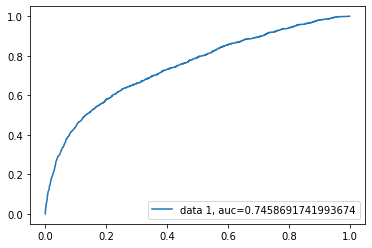

In [ ]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ =roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Implementing XGBoost**

In [ ]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

# **Applying XGBoost**

In [ ]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [ ]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [ ]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [ ]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=2, microseconds=988092)

In [ ]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest)

In [ ]:
len(train_class_preds_probs)

22374

In [ ]:

train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [ ]:
test_class_preds_probs[:20]

array([0.16704798, 0.18017879, 0.11583826, 0.5501304 , 0.71846825,
       0.7123599 , 0.1569848 , 0.20642279, 0.08607727, 0.3020746 ,
       0.31794643, 0.13487226, 0.1455448 , 0.6539297 , 0.50736743,
       0.2900065 , 0.12550196, 0.10935494, 0.102344  , 0.10229422],
      dtype=float32)

In [ ]:
test_class_preds[:20]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

In [ ]:
len(y_train)

22374

In [ ]:
len(train_class_preds)

22374

In [ ]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.8448198802181103
The accuracy on test data is  0.8108325512803325


In [ ]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.8108325512803325
The precision on test data is  0.33313180169286577
The recall on test data is  0.6414435389988359
The f1 on test data is  0.4385196975726223
The roc_score on train data is  0.7371611634388119


# **Hyperparameter Tuning**

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27, stratify = y)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [ ]:
gsearch1.best_score_

0.8192991865558237

In [ ]:
optimal_xgb = gsearch1.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.8245284705461696
The accuracy on test data is  0.8212897171202574


In [ ]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8212897171202574
The precision on test data is  0.34885126964933494
The recall on test data is  0.6926770708283313
The f1 on test data is  0.46401286690792115
The roc_score on train data is  0.7650677838294992


In [ ]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

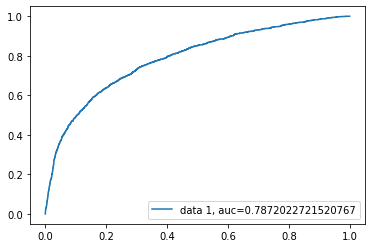

In [ ]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Matrix comparison
Models = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, svm_train_accuracy, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, svm_test_accuracy, test_accuracy_rf, test_accuracy_xgb_tuned] 
precision_score = [test_precision_score_lr,svm_test_precision, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, svm_test_recall , test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, svm_test_f1score, test_f1_score_rf, test_f1_score_xgb_tuned]


In [ ]:
pd.DataFrame({'Models Classifier': Models, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score, })

,Models Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.697026,0.681564,0.598992,0.366636,0.454858
1,SVC,0.734109,0.769674,0.482888,0.545949,0.512486
2,Random Forest CLf,0.995352,0.807883,0.358525,0.614508,0.452845
3,Xgboost Clf,0.824528,0.821290,0.348851,0.692677,0.464013


# **Conclusion**
1.There are no null values and duplicate values in our dataset.

2 Defaulters are less than the Non Defaulters. Approx 78% are Non Defaulters and 22% are Defaulters.

3.Number of Male credit holders is less than Female.

4.Approx 40% are male and 60% are Female and in that 10% are default from male & 13% are default from female.

5.We use box plot to detect outliers.

6.We implemented ML models and found that best accuracy, F1 score is obtained from random forest classifier, XGB classifier.

7.With RF classifier we get test accuracy of 81%.

8.With logistic regression test accuracy is 68%.

9.With SVC test accuracy is 77%.

10.With XG Boost test accuracy is 82%.

11.Therefore we can conclude based on test accuracy, F1 score, recall XG Boost classifier, RF Classifiers are best model to predict credit card default.



